# Forecasting of order demand in warehouses using autoregressive integrated moving average 

## Importing packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot
from statsmodels.tsa.stattools import adfuller
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

pylab.rcParams.update(params)
DataFrame=pd.read_csv('Historical Product Demand.csv')
DataFrame['Pandas_Datestamp'] = pd.to_datetime(DataFrame['Date'], infer_datetime_format=True)
DataFrame['Year'] = pd.DatetimeIndex(DataFrame['Date']).year
DataFrame['Month'] = pd.DatetimeIndex(DataFrame['Date']).month
DataFrame.sort_values(by='Pandas_Datestamp')
DataFrame.dropna()
#CHANGING STRING TO NUMERIC
DataFrame.Order_Demand = pd.to_numeric(DataFrame['Order_Demand'], errors='coerce')
Warehouse = DataFrame.Warehouse.unique() #GIVES 4 UNQUE WH
print DataFrame

         Product_Code Warehouse Product_Category        Date  Order_Demand  \
0        Product_0993    Whse_J     Category_028   2012/7/27         100.0   
1        Product_0979    Whse_J     Category_028   2012/1/19         500.0   
2        Product_0979    Whse_J     Category_028    2012/2/3         500.0   
3        Product_0979    Whse_J     Category_028    2012/2/9         500.0   
4        Product_0979    Whse_J     Category_028    2012/3/2         500.0   
5        Product_0979    Whse_J     Category_028   2012/4/19         500.0   
6        Product_0979    Whse_J     Category_028    2012/6/5         500.0   
7        Product_0979    Whse_J     Category_028   2012/6/27         500.0   
8        Product_0979    Whse_J     Category_028   2012/7/23         500.0   
9        Product_0979    Whse_J     Category_028   2012/8/29         500.0   
10       Product_0979    Whse_J     Category_028   2012/8/29         500.0   
11       Product_0979    Whse_J     Category_028   2012/9/18    

In [2]:
print len(Warehouse)

4


In [3]:
print Warehouse

['Whse_J' 'Whse_S' 'Whse_C' 'Whse_A']


# Data visualization 


In [11]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
for i in range(0, len(Warehouse)):
    WH_S=pd.DataFrame(DataFrame[DataFrame['Warehouse']== Warehouse[i]])
    WH_S_2012=WH_S[WH_S['Year']==2012]
    WH_S_2012=pd.DataFrame(WH_S.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2012= WH_S_2012.sort_values('Order_Demand', ascending=False)
    WH_S_2013=WH_S[WH_S['Year']==2013]
    WH_S_2013=pd.DataFrame(WH_S_2013.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2013=WH_S_2013.sort_values('Order_Demand', ascending=False)
    WH_S_2014=WH_S[WH_S['Year']==2014]
    WH_S_2014=pd.DataFrame(WH_S_2014.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2014=WH_S_2014.sort_values('Order_Demand', ascending=False)
    WH_S_2015=WH_S[WH_S['Year']==2015]
    WH_S_2015=pd.DataFrame(WH_S_2015.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2015=WH_S_2015.sort_values('Order_Demand', ascending=False)
    WH_S_2016=WH_S[WH_S['Year']==2016]
    WH_S_2016=pd.DataFrame(WH_S_2016.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2016=WH_S_2016.sort_values('Order_Demand', ascending=False)
    trace1 = go.Bar(x=WH_S_2012['Product_Category'],  y=WH_S_2012['Order_Demand'], name='Year_2012')
    trace2 = go.Bar(x=WH_S_2013['Product_Category'],  y=WH_S_2013['Order_Demand'], name='Year_2013')
    trace3 = go.Bar(x=WH_S_2014['Product_Category'],  y=WH_S_2014['Order_Demand'], name='Year_2014')
    trace4 = go.Bar(x=WH_S_2015['Product_Category'],  y=WH_S_2015['Order_Demand'], name='Year_2015')
    trace5 = go.Bar(x=WH_S_2016['Product_Category'],  y=WH_S_2016['Order_Demand'], name='Year_2016')
    fig = tools.make_subplots(rows=2, cols=5)
    fig.append_trace(trace5, 1, 1)
    fig.append_trace(trace4, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig.append_trace(trace2, 1, 4)
    fig.append_trace(trace1, 1, 5)
    layout=fig['layout'].update(height=500, width=1200, title='Order demand vs product category with respect to all years for '+ str (Warehouse[i]),xaxis=dict(
        title='Product Category',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')))
    py.iplot(fig, filename='stacked-subplots', layout=layout)
    plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]



## Function to separate warehouse according to year and concatenate it vertically

In [12]:
#FUNCTION FOR DIFFERENT WAREHOUSES
def diff_warehouse(Whse_A):
  
    #SCALING THE ORDER DEMAND
    
    WH_A=pd.DataFrame(DataFrame[DataFrame['Warehouse']== Whse_A]) #EXTRACTING A SPECIFIC WAREHOUSE
    cols_to_norm = ['Order_Demand'] #SCALING
    WH_A[cols_to_norm] = WH_A[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) #SCALING
    WH_A.sort_values(by='Pandas_Datestamp')


    #SEPARATING AS PER YEAR
    WH_A_2012=WH_A[WH_A['Year']==2012]
    WH_A_2012['Month'] = WH_A_2012['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH 
    WH_A_2012=pd.DataFrame(WH_A_2012.groupby('Month', as_index=False)['Order_Demand'].mean())
    WH_A_2012.sort_values(by='Month')

    WH_A_2013=WH_A[WH_A['Year']==2013]
    WH_A_2013['Month'] = WH_A_2013['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    WH_A_2013=pd.DataFrame(WH_A_2013.groupby('Month', as_index=False)['Order_Demand'].mean())
    WH_A_2013.sort_values(by='Month')

    WH_A_2014=WH_A[WH_A['Year']==2014]
    WH_A_2014['Month'] = WH_A_2014['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    WH_A_2014=pd.DataFrame(WH_A_2014.groupby('Month', as_index=False)['Order_Demand'].mean())
    WH_A_2014.sort_values(by='Month')

    WH_A_2015=WH_A[WH_A['Year']==2015]
    WH_A_2015['Month'] = WH_A_2015['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    WH_A_2015=pd.DataFrame(WH_A_2015.groupby('Month', as_index=False)['Order_Demand'].mean())
    WH_A_2015.sort_values(by='Month')

    WH_A_2016=WH_A[WH_A['Year']==2016]
    WH_A_2016['Month'] = WH_A_2016['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    WH_A_2016=pd.DataFrame(WH_A_2016.groupby('Month', as_index=False)['Order_Demand'].mean())
    WH_A_2016.sort_values(by='Month')

#CONCATENATION

    WH_A_ALLYEARS = pd.concat([WH_A_2012,WH_A_2013,WH_A_2014,WH_A_2015,WH_A_2016]).reset_index(drop=True) #, axis=1
    WH_A_ALLYEARS.index = WH_A_ALLYEARS['Month']
    WH_A_ALLYEARS.drop(columns='Month')
    WH_A_ALLYEARS= WH_A_ALLYEARS.drop(columns='Month')
    WH_A_ALLYEARS.reset_index(inplace=True)
    WH_A_ALLYEARS['Month'] = pd.to_datetime(WH_A_ALLYEARS['Month'])
    WH_A_ALLYEARS = WH_A_ALLYEARS.set_index('Month')
    #ROLLING AVERGAGE FORMULA - TRIAL WITH MOVING WINDOW
    WH_A_ALLYEARS['MA_3']= WH_A_ALLYEARS.Order_Demand.rolling(3).mean()
    WH_A_ALLYEARS['MA_3_std']= WH_A_ALLYEARS.Order_Demand.rolling(3).std() #QUATERLY
    WH_A_ALLYEARS['Warehouse'] = Whse_A
    return WH_A_ALLYEARS


In [13]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(Warehouse)):
    print '\n\n\n\n___________________________________________________________________________________________________________________________'
    print color.BOLD  + '\n\t\t\t %s \n'% Warehouse[i] + color.END
    print diff_warehouse(Warehouse[i])
    






___________________________________________________________________________________________________________________________

			 Whse_J 



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

            Order_Demand      MA_3  MA_3_std Warehouse
Month                                                 
2012-01-01      0.001439       NaN       NaN    Whse_J
2012-02-01      0.001398       NaN       NaN    Whse_J
2012-03-01      0.001318  0.001385  0.000061    Whse_J
2012-04-01      0.001365  0.001361  0.000040    Whse_J
2012-05-01      0.001464  0.001382  0.000074    Whse_J
2012-06-01      0.001433  0.001421  0.000050    Whse_J
2012-07-01      0.001347  0.001415  0.000060    Whse_J
2012-08-01      0.001353  0.001378  0.000048    Whse_J
2012-09-01      0.001283  0.001328  0.000039    Whse_J
2012-10-01      0.001289  0.001308  0.000039    Whse_J
2012-11-01      0.001394  0.001322  0.000062    Whse_J
2012-12-01      0.001399  0.001361  0.000062    Whse_J
2013-01-01      0.001468  0.001420  0.000041    Whse_J
2013-02-01      0.001364  0.001410  0.000053    Whse_J
2013-03-01      0.001353  0.001395  0.000063    Whse_J
2013-04-01      0.001389  0.001369  0.000018    Whse_J
2013-05-01

            Order_Demand      MA_3  MA_3_std Warehouse
Month                                                 
2012-01-01      0.002481       NaN       NaN    Whse_A
2012-02-01      0.002862       NaN       NaN    Whse_A
2012-03-01      0.002532  0.002625  0.000207    Whse_A
2012-04-01      0.002368  0.002587  0.000252    Whse_A
2012-05-01      0.002453  0.002451  0.000082    Whse_A
2012-06-01      0.002761  0.002527  0.000207    Whse_A
2012-07-01      0.002521  0.002578  0.000162    Whse_A
2012-08-01      0.002489  0.002590  0.000149    Whse_A
2012-09-01      0.002518  0.002509  0.000018    Whse_A
2012-10-01      0.002651  0.002553  0.000086    Whse_A
2012-11-01      0.002637  0.002602  0.000073    Whse_A
2012-12-01      0.003090  0.002793  0.000258    Whse_A
2013-01-01      0.002966  0.002898  0.000234    Whse_A
2013-02-01      0.002864  0.002974  0.000113    Whse_A
2013-03-01      0.002710  0.002847  0.000129    Whse_A
2013-04-01      0.002572  0.002715  0.000146    Whse_A
2013-05-01

In [14]:
def Plot_Original(WH_A_ALLYEARS):
    Actual1 = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS.Order_Demand, mode = 'lines+markers',name = 'Actual')
    MA_3 = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS.MA_3, mode = 'lines+markers',name = '3-PERIOD MOVING AVERAGE')
    MA_3_std = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS.MA_3_std, mode = 'lines+markers',name = '3-PERIOD MOVING STANDARD DEVIATION')
    data1= [Actual1, MA_3, MA_3_std]
    layout = go.Layout(
    title='Order Demand for ' + Warehouse[i],
    xaxis=dict(
        title='Years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
    plot_2 = go.Figure(data=data1, layout=layout)
   # plot_image = py.plot(plot_2, filename='styling-names')
    return plot(plot_2, filename='styling-names')

In [15]:
for i in range(0,len(Warehouse)):
    print Plot_Original(diff_warehouse(Warehouse[i]))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

file://C:\Users\sohit\Documents\Downloads\productdemandforecasting\styling-names.html
file://C:\Users\sohit\Documents\Downloads\productdemandforecasting\styling-names.html
file://C:\Users\sohit\Documents\Downloads\productdemandforecasting\styling-names.html
file://C:\Users\sohit\Documents\Downloads\productdemandforecasting\styling-names.html


## Function to test the stationarity of the graph

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput





___________________________________________________________________________________________________________________________


							 Whse_J 



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

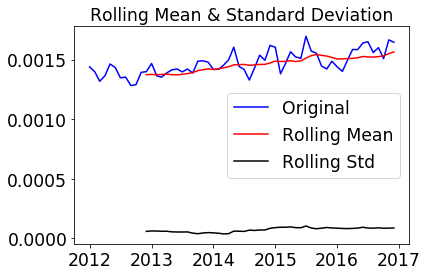

Results of Dickey-Fuller Test:
Test Statistic                 -3.064116
p-value                         0.029325
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (5%)            -2.911939
Critical Value (1%)            -3.546395
Critical Value (10%)           -2.593652
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_S 



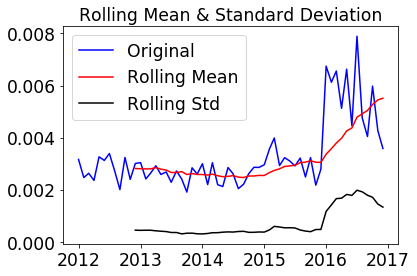

Results of Dickey-Fuller Test:
Test Statistic                 -2.047127
p-value                         0.266299
#Lags Used                      1.000000
Number of Observations Used    58.000000
Critical Value (5%)            -2.912837
Critical Value (1%)            -3.548494
Critical Value (10%)           -2.594129
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_C 



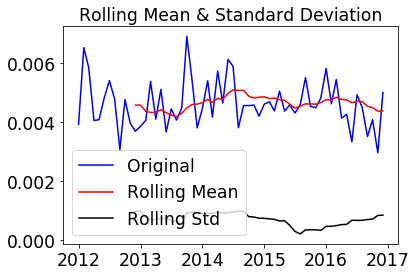

Results of Dickey-Fuller Test:
Test Statistic                -7.083129e+00
p-value                        4.611053e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (5%)           -2.911939e+00
Critical Value (1%)           -3.546395e+00
Critical Value (10%)          -2.593652e+00
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_A 



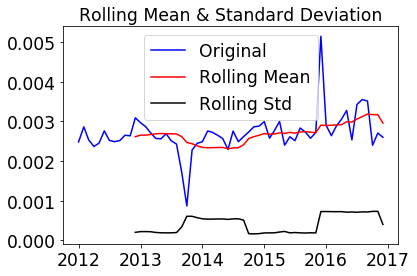

Results of Dickey-Fuller Test:
Test Statistic                 -5.299856
p-value                         0.000005
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (5%)            -2.911939
Critical Value (1%)            -3.546395
Critical Value (10%)           -2.593652
dtype: float64
None


In [17]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(Warehouse)):
    print '\n\n\n\n___________________________________________________________________________________________________________________________'
    print color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% Warehouse[i] + color.END
    print test_stationarity(diff_warehouse(Warehouse[i]).Order_Demand)
    
    

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i





___________________________________________________________________________________________________________________________


							 Whse_J 



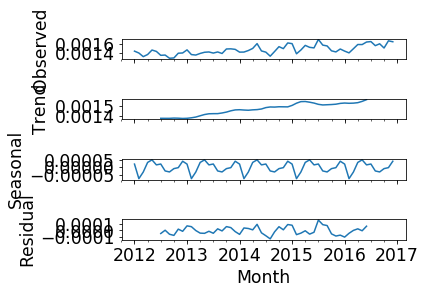





___________________________________________________________________________________________________________________________


							 Whse_S 



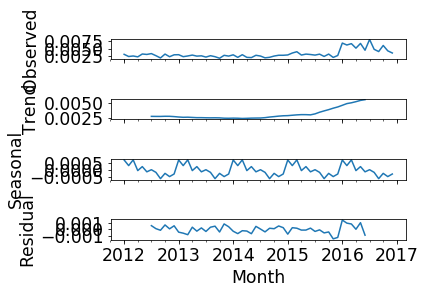





___________________________________________________________________________________________________________________________


							 Whse_C 



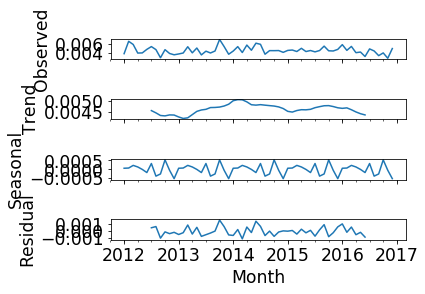





___________________________________________________________________________________________________________________________


							 Whse_A 



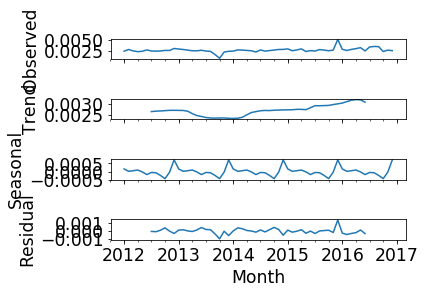

In [18]:
for i in range(0,len(Warehouse)):
    decomp=sm.tsa.seasonal_decompose(diff_warehouse(Warehouse[i]).Order_Demand,freq = 12)
    plt.show()
    print '\n\n\n\n___________________________________________________________________________________________________________________________'
    print color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% Warehouse[i] + color.END
    decomp.plot()
    

## `for` loop for creating ACF and PACF plots

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i





___________________________________________________________________________________________________________________________


							 Whse_J 



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



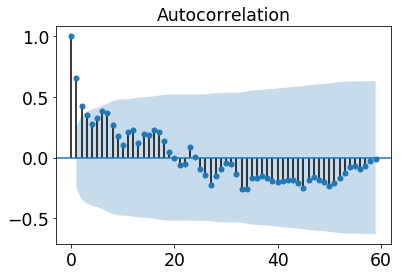

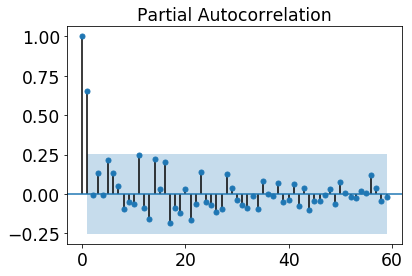





___________________________________________________________________________________________________________________________


							 Whse_S 



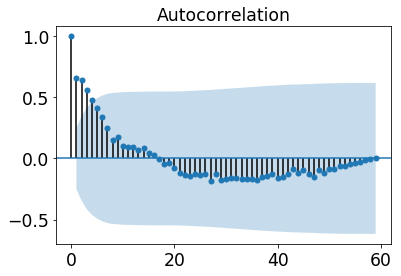

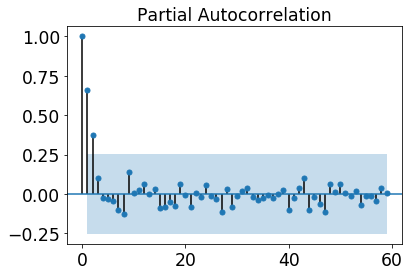





___________________________________________________________________________________________________________________________


							 Whse_C 



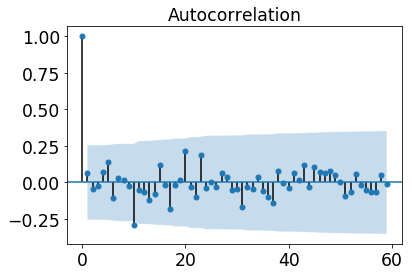

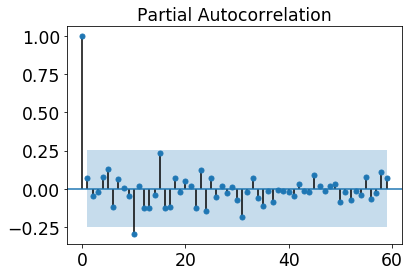





___________________________________________________________________________________________________________________________


							 Whse_A 



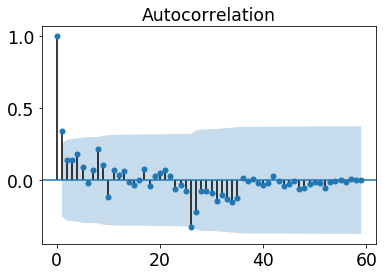

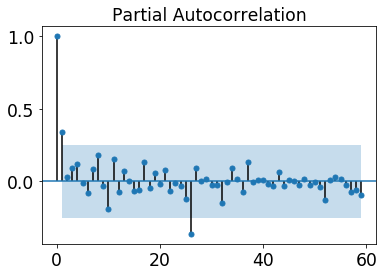

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

for i in range(0,len(Warehouse)):
    plot_acf(diff_warehouse(Warehouse[i]).Order_Demand)
    print '\n\n\n\n___________________________________________________________________________________________________________________________'
    print color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% Warehouse[i] + color.END
    plt.show()
    plot_pacf(diff_warehouse(Warehouse[i]).Order_Demand)
    plt.show()

## Method 2 - Auto Arima

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i





___________________________________________________________________________________________________________________________


							 Whse_J 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=n

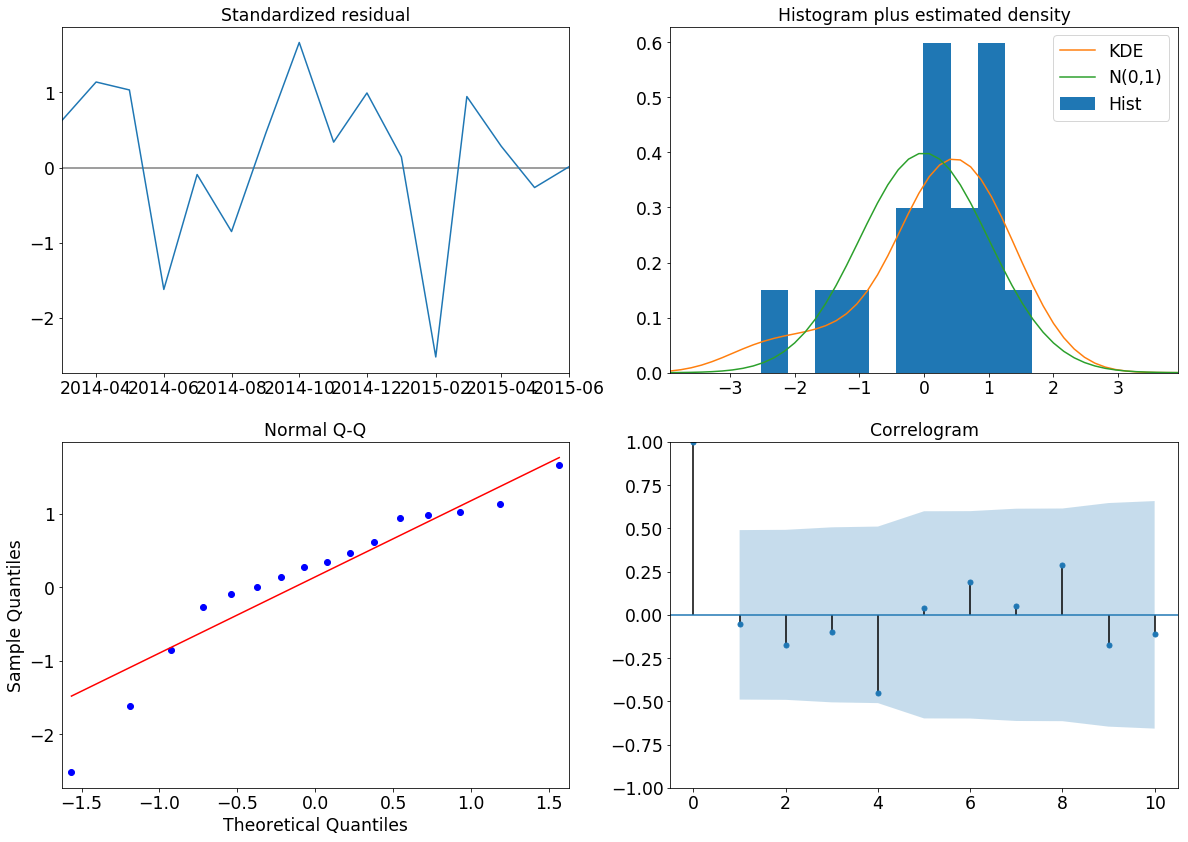




						 Forecasting using trained model - 70% Data 
2016-01-01    0.001601
2016-02-01    0.001540
2016-03-01    0.001541
2016-04-01    0.001575
2016-05-01    0.001621
2016-06-01    0.001727
2016-07-01    0.001566
2016-08-01    0.001539
2016-09-01    0.001450
2016-10-01    0.001553
2016-11-01    0.001660
2016-12-01    0.001616
2017-01-01    0.001742
2017-02-01    0.001726
2017-03-01    0.001503
2017-04-01    0.001585
2017-05-01    0.001688
2017-06-01    0.001645
2017-07-01    0.001633
2017-08-01    0.001655
2017-09-01    0.001647
2017-10-01    0.001670
Freq: MS, dtype: float64



						 Dataframe of Forecasting 
            ORDER_DEMAND_FORECAST
2016-01-01               0.001601
2016-02-01               0.001540
2016-03-01               0.001541
2016-04-01               0.001575
2016-05-01               0.001621
2016-06-01               0.001727
2016-07-01               0.001566
2016-08-01               0.001539
2016-09-01               0.001450
2016-10-01               0.001553
2016-

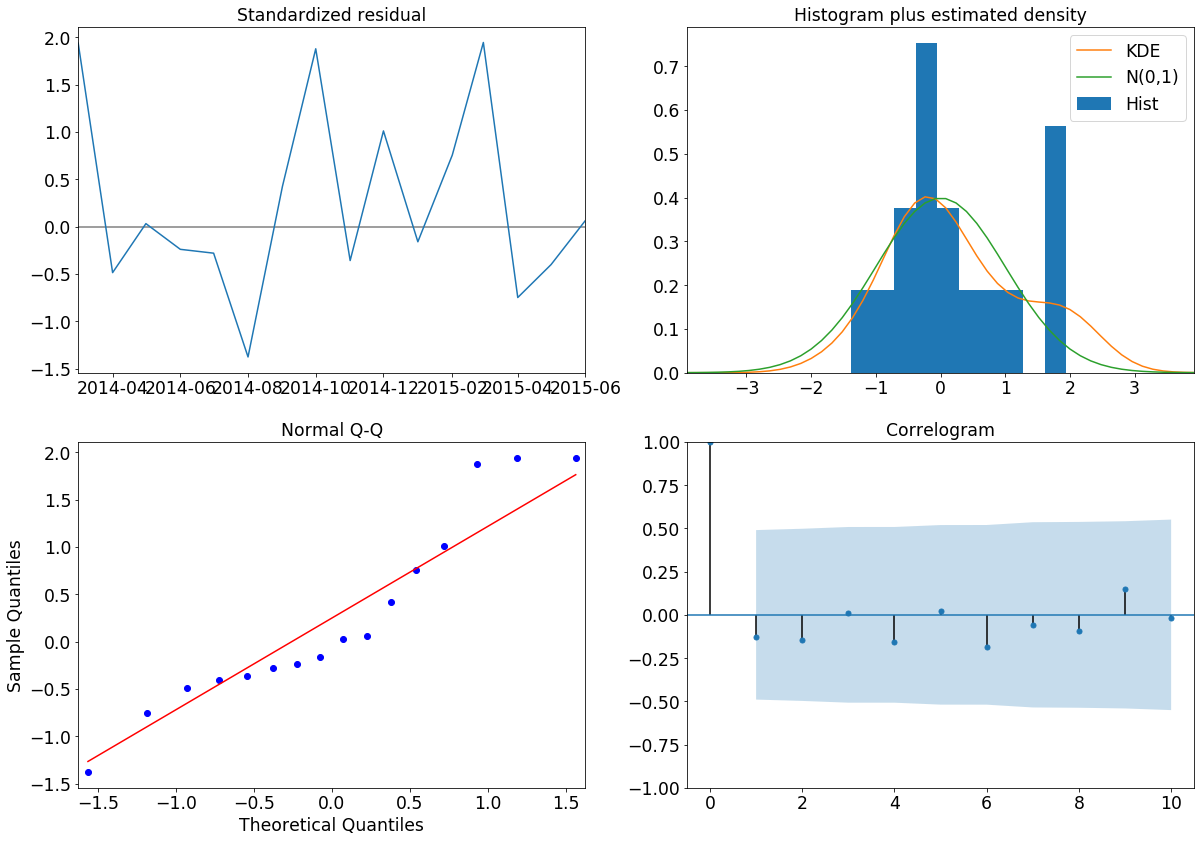




						 Forecasting using trained model - 70% Data 
2016-01-01    0.003085
2016-02-01    0.003483
2016-03-01    0.002684
2016-04-01    0.003522
2016-05-01    0.002678
2016-06-01    0.002608
2016-07-01    0.003337
2016-08-01    0.003099
2016-09-01    0.002528
2016-10-01    0.002697
2016-11-01    0.003099
2016-12-01    0.003347
2017-01-01    0.003342
2017-02-01    0.003446
2017-03-01    0.004059
2017-04-01    0.004474
2017-05-01    0.003414
2017-06-01    0.003717
2017-07-01    0.003586
2017-08-01    0.003657
2017-09-01    0.003261
2017-10-01    0.003695
Freq: MS, dtype: float64



						 Dataframe of Forecasting 
            ORDER_DEMAND_FORECAST
2016-01-01               0.003085
2016-02-01               0.003483
2016-03-01               0.002684
2016-04-01               0.003522
2016-05-01               0.002678
2016-06-01               0.002608
2016-07-01               0.003337
2016-08-01               0.003099
2016-09-01               0.002528
2016-10-01               0.002697
2016-

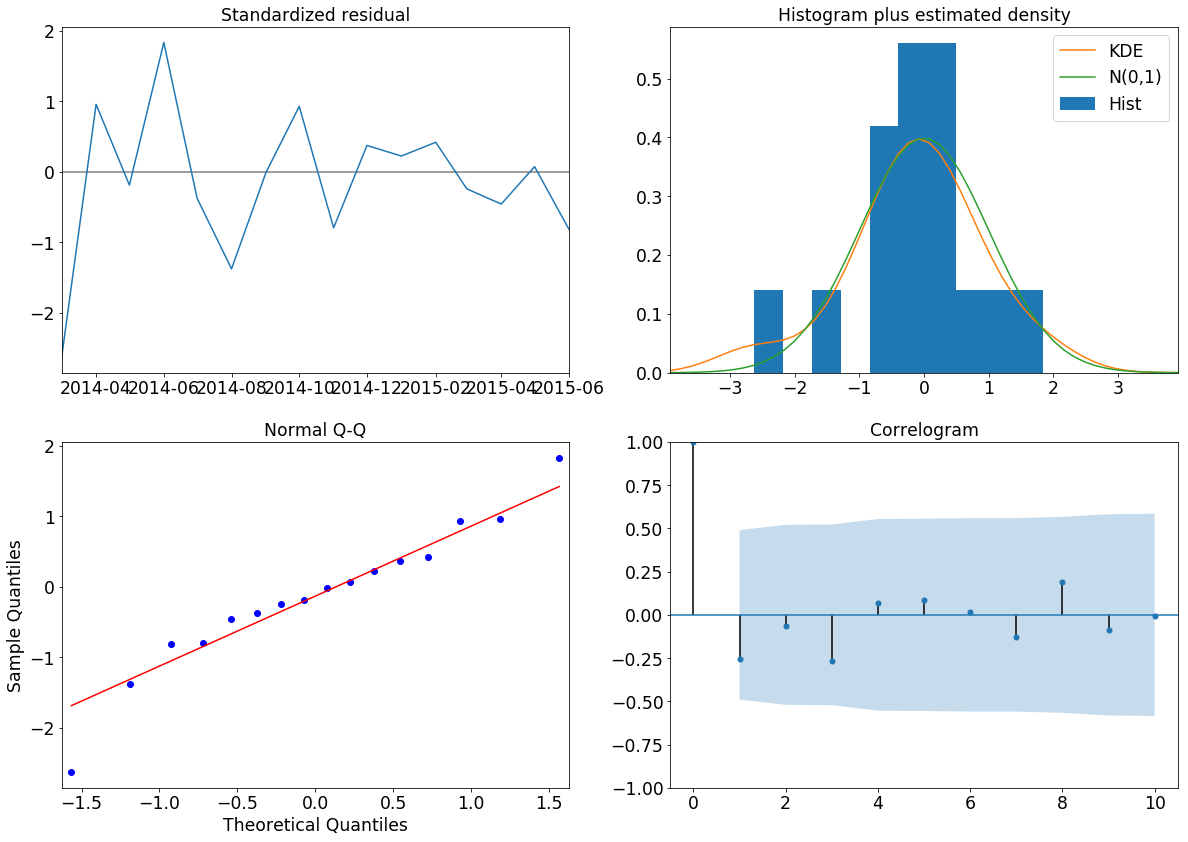




						 Forecasting using trained model - 70% Data 
2016-01-01    0.004068
2016-02-01    0.004735
2016-03-01    0.005662
2016-04-01    0.004432
2016-05-01    0.005990
2016-06-01    0.004909
2016-07-01    0.006384
2016-08-01    0.006148
2016-09-01    0.004072
2016-10-01    0.004826
2016-11-01    0.004821
2016-12-01    0.004840
2017-01-01    0.004464
2017-02-01    0.004871
2017-03-01    0.004951
2017-04-01    0.004641
2017-05-01    0.005309
2017-06-01    0.004635
2017-07-01    0.004849
2017-08-01    0.003800
2017-09-01    0.005113
2017-10-01    0.004551
Freq: MS, dtype: float64



						 Dataframe of Forecasting 
            ORDER_DEMAND_FORECAST
2016-01-01               0.004068
2016-02-01               0.004735
2016-03-01               0.005662
2016-04-01               0.004432
2016-05-01               0.005990
2016-06-01               0.004909
2016-07-01               0.006384
2016-08-01               0.006148
2016-09-01               0.004072
2016-10-01               0.004826
2016-

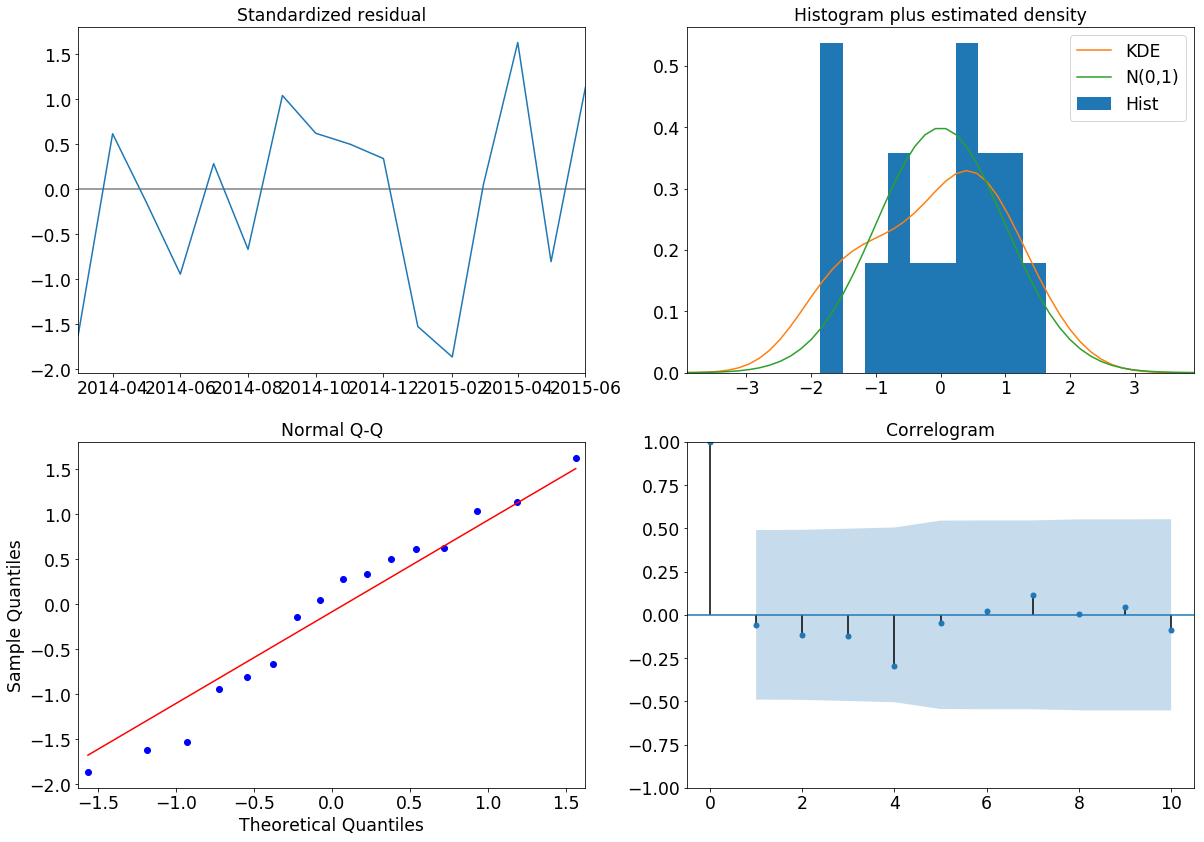




						 Forecasting using trained model - 70% Data 
2016-01-01    0.002520
2016-02-01    0.002568
2016-03-01    0.002823
2016-04-01    0.002791
2016-05-01    0.002723
2016-06-01    0.002636
2016-07-01    0.002359
2016-08-01    0.002826
2016-09-01    0.002560
2016-10-01    0.002686
2016-11-01    0.002803
2016-12-01    0.002934
2017-01-01    0.002950
2017-02-01    0.003063
2017-03-01    0.002648
2017-04-01    0.002832
2017-05-01    0.003068
2017-06-01    0.002470
2017-07-01    0.002682
2017-08-01    0.002952
2017-09-01    0.002614
2017-10-01    0.002522
Freq: MS, dtype: float64



						 Dataframe of Forecasting 
            ORDER_DEMAND_FORECAST
2016-01-01               0.002520
2016-02-01               0.002568
2016-03-01               0.002823
2016-04-01               0.002791
2016-05-01               0.002723
2016-06-01               0.002636
2016-07-01               0.002359
2016-08-01               0.002826
2016-09-01               0.002560
2016-10-01               0.002686
2016-

In [20]:
from pyramid.arima import auto_arima
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

for i in range(0,len(Warehouse)):
    train = diff_warehouse(Warehouse[i]).iloc[0:int(len(diff_warehouse(Warehouse[i]))*0.7)]
    test = diff_warehouse(Warehouse[i]).iloc[int(len(diff_warehouse(Warehouse[i]))*0.7)+1:]
    print  '\n\n\n\n___________________________________________________________________________________________________________________________'
    print color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% Warehouse[i] + color.END
    stepwise_model = auto_arima(train.Order_Demand, start_p=1, start_q=1,max_p=3, max_q=3, m=25,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,)
    order_in = stepwise_model.order
    seasonal_order_in = stepwise_model.seasonal_order
    print'Least AIC ',stepwise_model.aic()
    print'Least BIC ',stepwise_model.bic()
   
    mod = sm.tsa.statespace.SARIMAX(train.Order_Demand, trend='n', order=order_in , seasonal_order=seasonal_order_in,enforce_invertibility=False)
    results = mod.fit()
    print '\n\n\n',results.summary()
    
    print '\n\n\n\t\t\t\t\t\t Plotting Diagnostics'
    results.plot_diagnostics(figsize=(20, 14))
    plt.show()
    
    print '\n\n\n\t\t\t\t\t\t Forecasting using trained model - 70% Data '
    prediction_1 = results.get_forecast('2017-12')
    prediction_1_ci = prediction_1.conf_int()
    print(prediction_1.predicted_mean['2016-01':'2017-10'])
    
    pred = prediction_1.predicted_mean['2016-01':'2017-10']
    
    print '\n\n\n\t\t\t\t\t\t Dataframe of Forecasting '
    Prediction_df = pd.DataFrame(pred,columns=['ORDER_DEMAND_FORECAST'])
    print Prediction_df
    
    #print("%s",% Warehouse[i].center())
    
   # Prediction_df = pd.DataFrame(prediction_1,columns=['ORDER_DEMAND_FORECAST'])
   # Prediction_df

    Given = go.Scatter(x=diff_warehouse(Warehouse[i]).index, y=diff_warehouse(Warehouse[i]).Order_Demand, mode = 'lines+markers',name = 'Order_Demand'+ Warehouse[i])
    Predicted=go.Scatter(x=Prediction_df.index, y=Prediction_df.ORDER_DEMAND_FORECAST, mode = 'lines+markers',name = 'Predicted_Order_Demand'+ Warehouse[i])
    #Actual = go.Scatter(x=WH_A_ALLYEARS_FO.index, y=WH_A_ALLYEARS_FO.Order_Demand, mode = 'lines+markers',name = 'Actual')
    Final_Visu =[Given,Predicted]
    layout = go.Layout(
    title='Forecasted Order Demand for ' + Warehouse[i],
    xaxis=dict(
        title='Years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
    Visu = go.Figure(data=Final_Visu, layout=layout)
    print plot(Visu, filename='styling-names')

In [21]:
a = diff_warehouse(Warehouse[1])
print a

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

            Order_Demand      MA_3  MA_3_std Warehouse
Month                                                 
2012-01-01      0.003160       NaN       NaN    Whse_S
2012-02-01      0.002464       NaN       NaN    Whse_S
2012-03-01      0.002629  0.002751  0.000364    Whse_S
2012-04-01      0.002354  0.002482  0.000139    Whse_S
2012-05-01      0.003261  0.002748  0.000465    Whse_S
2012-06-01      0.003122  0.002912  0.000488    Whse_S
2012-07-01      0.003387  0.003256  0.000133    Whse_S
2012-08-01      0.002724  0.003078  0.000334    Whse_S
2012-09-01      0.002002  0.002704  0.000693    Whse_S
2012-10-01      0.003235  0.002653  0.000620    Whse_S
2012-11-01      0.002395  0.002544  0.000630    Whse_S
2012-12-01      0.003005  0.002878  0.000434    Whse_S
2013-01-01      0.003037  0.002812  0.000362    Whse_S
2013-02-01      0.002412  0.002818  0.000352    Whse_S
2013-03-01      0.002631  0.002693  0.000317    Whse_S
2013-04-01      0.002916  0.002653  0.000253    Whse_S
2013-05-01

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
#DIFFERENCING
#DataFrame.diff(periods=1, axis=0)
#Differencing is selected based on the Dickey Fuller test
a['DIFFERENCING']=diff_warehouse(Warehouse[1])['Order_Demand'].diff(periods=1) 
a['DIFFERENCING'].head()
len(a)
a
#PERIODS CAN CHANGE - WE NEED CHECK WHICH ORDER OF DIFFERENCING IS BETTER. FIRST ORDER REMOVES TREND, SECOND ORDER REMOVES SEASONALITY

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,Order_Demand,MA_3,MA_3_std,Warehouse,DIFFERENCING
Month,,,,,
2012-01-01,0.003160,NaN,NaN,Whse_S,NaN
2012-02-01,0.002464,NaN,NaN,Whse_S,-0.000696
2012-03-01,0.002629,0.002751,0.000364,Whse_S,0.000166
2012-04-01,0.002354,0.002482,0.000139,Whse_S,-0.000275
2012-05-01,0.003261,0.002748,0.000465,Whse_S,0.000907
2012-06-01,0.003122,0.002912,0.000488,Whse_S,-0.000139
2012-07-01,0.003387,0.003256,0.000133,Whse_S,0.000265
2012-08-01,0.002724,0.003078,0.000334,Whse_S,-0.000663
2012-09-01,0.002002,0.002704,0.000693,Whse_S,-0.000722


## Dividing the data into testing data and training data

In [23]:
train1 = a.iloc[0:40]
train1.head()
len(train1)
train1

,Order_Demand,MA_3,MA_3_std,Warehouse,DIFFERENCING
Month,,,,,
2012-01-01,0.003160,NaN,NaN,Whse_S,NaN
2012-02-01,0.002464,NaN,NaN,Whse_S,-0.000696
2012-03-01,0.002629,0.002751,0.000364,Whse_S,0.000166
2012-04-01,0.002354,0.002482,0.000139,Whse_S,-0.000275
2012-05-01,0.003261,0.002748,0.000465,Whse_S,0.000907
2012-06-01,0.003122,0.002912,0.000488,Whse_S,-0.000139
2012-07-01,0.003387,0.003256,0.000133,Whse_S,0.000265
2012-08-01,0.002724,0.003078,0.000334,Whse_S,-0.000663
2012-09-01,0.002002,0.002704,0.000693,Whse_S,-0.000722


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()



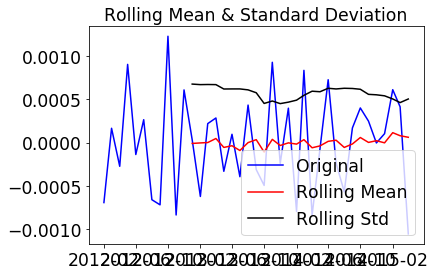

Results of Dickey-Fuller Test:
Test Statistic                -6.840175e+00
p-value                        1.799633e-09
#Lags Used                     1.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (5%)           -2.943539e+00
Critical Value (1%)           -3.620918e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


In [24]:
test_stationarity(train1.DIFFERENCING.dropna(inplace=False))

In [25]:
train1.reset_index(inplace=True)
train1['Month'] = pd.to_datetime(train1['Month'])
train1 = train1.set_index('Month')
train1.DIFFERENCING.dropna(inplace=True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



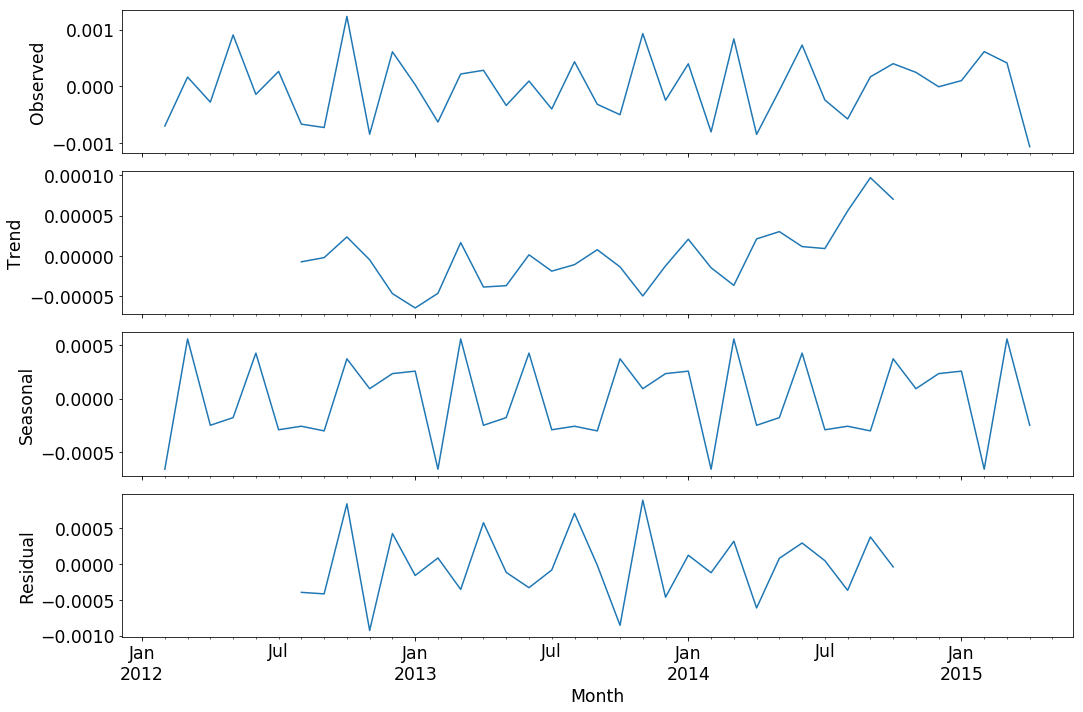

In [28]:
decomp=sm.tsa.seasonal_decompose(train1.DIFFERENCING,freq = 12)
decomp.plot()
plt.show()

In [29]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train1.Order_Demand, start_p=1, start_q=1,max_p=3, max_q=3, m=25,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,)
print(stepwise_model.bic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_orde

In [30]:
mod = sm.tsa.statespace.SARIMAX(train1.Order_Demand, trend='n', order=(1, 1, 0),seasonal_order=(0, 1, 0, 25),enforce_invertibility=False)
results = mod.fit()
print results.summary()

                                 Statespace Model Results                                 
Dep. Variable:                       Order_Demand   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 25)   Log Likelihood                  80.595
Date:                            Wed, 16 May 2018   AIC                           -157.190
Time:                                    11:07:05   BIC                           -153.812
Sample:                                01-01-2012   HQIC                          -155.969
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5103      0.318     -1.605      0.109      -1.134       0.113
sigma2      5.653e-07   2.55e-07   

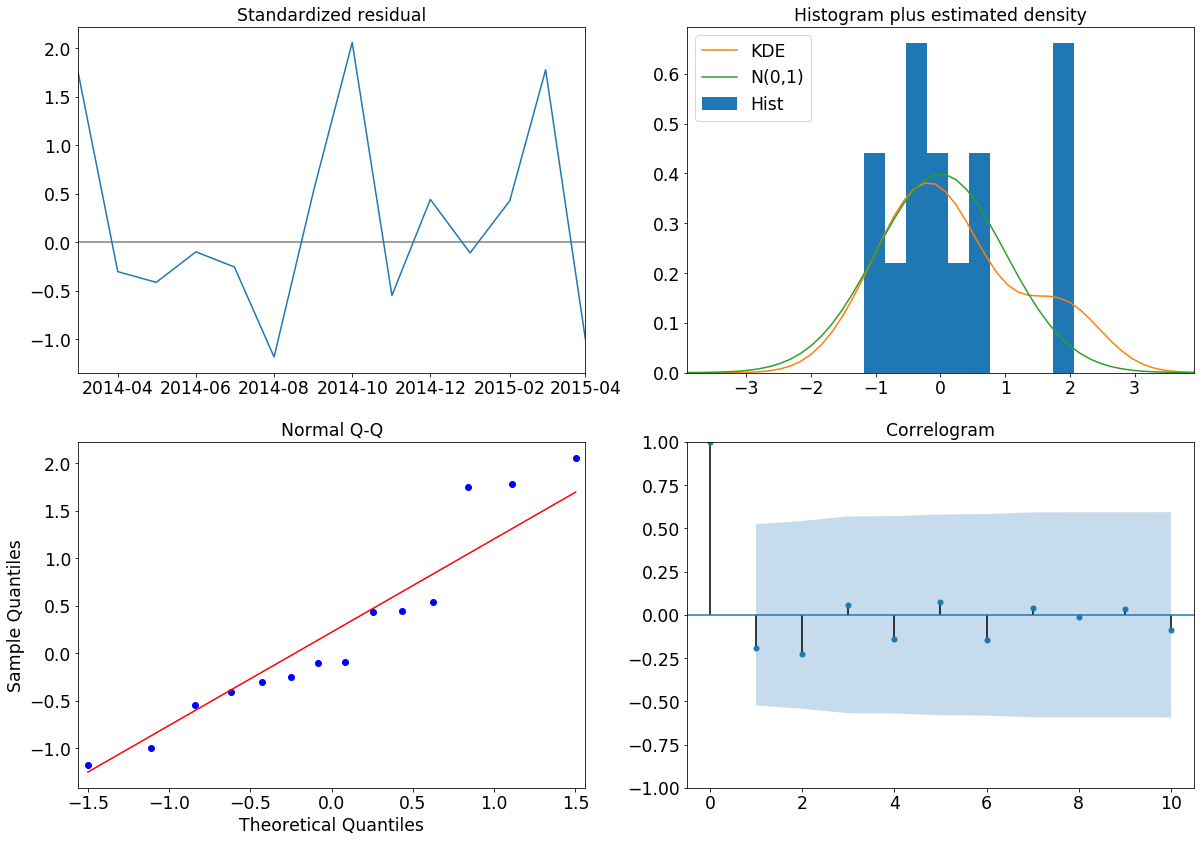

In [31]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [32]:
train1

,Order_Demand,MA_3,MA_3_std,Warehouse,DIFFERENCING
Month,,,,,
2012-01-01,0.003160,NaN,NaN,Whse_S,NaN
2012-02-01,0.002464,NaN,NaN,Whse_S,-0.000696
2012-03-01,0.002629,0.002751,0.000364,Whse_S,0.000166
2012-04-01,0.002354,0.002482,0.000139,Whse_S,-0.000275
2012-05-01,0.003261,0.002748,0.000465,Whse_S,0.000907
2012-06-01,0.003122,0.002912,0.000488,Whse_S,-0.000139
2012-07-01,0.003387,0.003256,0.000133,Whse_S,0.000265
2012-08-01,0.002724,0.003078,0.000334,Whse_S,-0.000663
2012-09-01,0.002002,0.002704,0.000693,Whse_S,-0.000722


In [33]:
pred_1 = results.get_forecast('2017-12')
pred2_ci = pred_1.conf_int()
print(pred_1.predicted_mean['2016-12':'2017-10'])

2016-12-01    0.003584
2017-01-01    0.003580
2017-02-01    0.003683
2017-03-01    0.004296
2017-04-01    0.004711
2017-05-01    0.003651
2017-06-01    0.004589
2017-07-01    0.003922
2017-08-01    0.004188
2017-09-01    0.003705
2017-10-01    0.004184
Freq: MS, dtype: float64


In [34]:
pred = pred_1.predicted_mean['2016-12':'2017-10']
pred

2016-12-01    0.003584
2017-01-01    0.003580
2017-02-01    0.003683
2017-03-01    0.004296
2017-04-01    0.004711
2017-05-01    0.003651
2017-06-01    0.004589
2017-07-01    0.003922
2017-08-01    0.004188
2017-09-01    0.003705
2017-10-01    0.004184
Freq: MS, dtype: float64

In [35]:
PE_1 = pd.DataFrame(pred,columns=['ORDER_DEMAND_FORECAST'])
PE_1

,ORDER_DEMAND_FORECAST
2016-12-01,0.003584
2017-01-01,0.003580
2017-02-01,0.003683
2017-03-01,0.004296
2017-04-01,0.004711
2017-05-01,0.003651
2017-06-01,0.004589
2017-07-01,0.003922
2017-08-01,0.004188
2017-09-01,0.003705


In [36]:
Given1 = go.Scatter(x=diff_warehouse(Warehouse[1]).index, y=diff_warehouse(Warehouse[1]).Order_Demand, mode = 'lines+markers',name = 'Order_Demand'+ Warehouse[1])
Predicted1=go.Scatter(x=PE_1.index, y=PE_1.ORDER_DEMAND_FORECAST, mode = 'lines+markers',name = 'Predicted_Order_Demand'+ Warehouse[1])
#Actual = go.Scatter(x=WH_A_ALLYEARS_FO.index, y=WH_A_ALLYEARS_FO.Order_Demand, mode = 'lines+markers',name = 'Actual')
Final_Visu1 =[Given1,Predicted1]
plot(Final_Visu1)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

'file://C:\\Users\\sohit\\Documents\\Downloads\\productdemandforecasting\\temp-plot.html'

In [37]:
#a=a.drop(columns='MA_3')
#a=a.drop(columns='MA_3_std')
#a = a.drop(columns='DIFFERENCING')
#a = a.drop(columns='Warehouse')
a

,Order_Demand,MA_3,MA_3_std,Warehouse,DIFFERENCING
Month,,,,,
2012-01-01,0.003160,NaN,NaN,Whse_S,NaN
2012-02-01,0.002464,NaN,NaN,Whse_S,-0.000696
2012-03-01,0.002629,0.002751,0.000364,Whse_S,0.000166
2012-04-01,0.002354,0.002482,0.000139,Whse_S,-0.000275
2012-05-01,0.003261,0.002748,0.000465,Whse_S,0.000907
2012-06-01,0.003122,0.002912,0.000488,Whse_S,-0.000139
2012-07-01,0.003387,0.003256,0.000133,Whse_S,0.000265
2012-08-01,0.002724,0.003078,0.000334,Whse_S,-0.000663
2012-09-01,0.002002,0.002704,0.000693,Whse_S,-0.000722


## Final forecast visualization code

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i





___________________________________________________________________________________________________________________________


							 Whse_A 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 25); AIC=nan, BIC=nan, Fit time=n

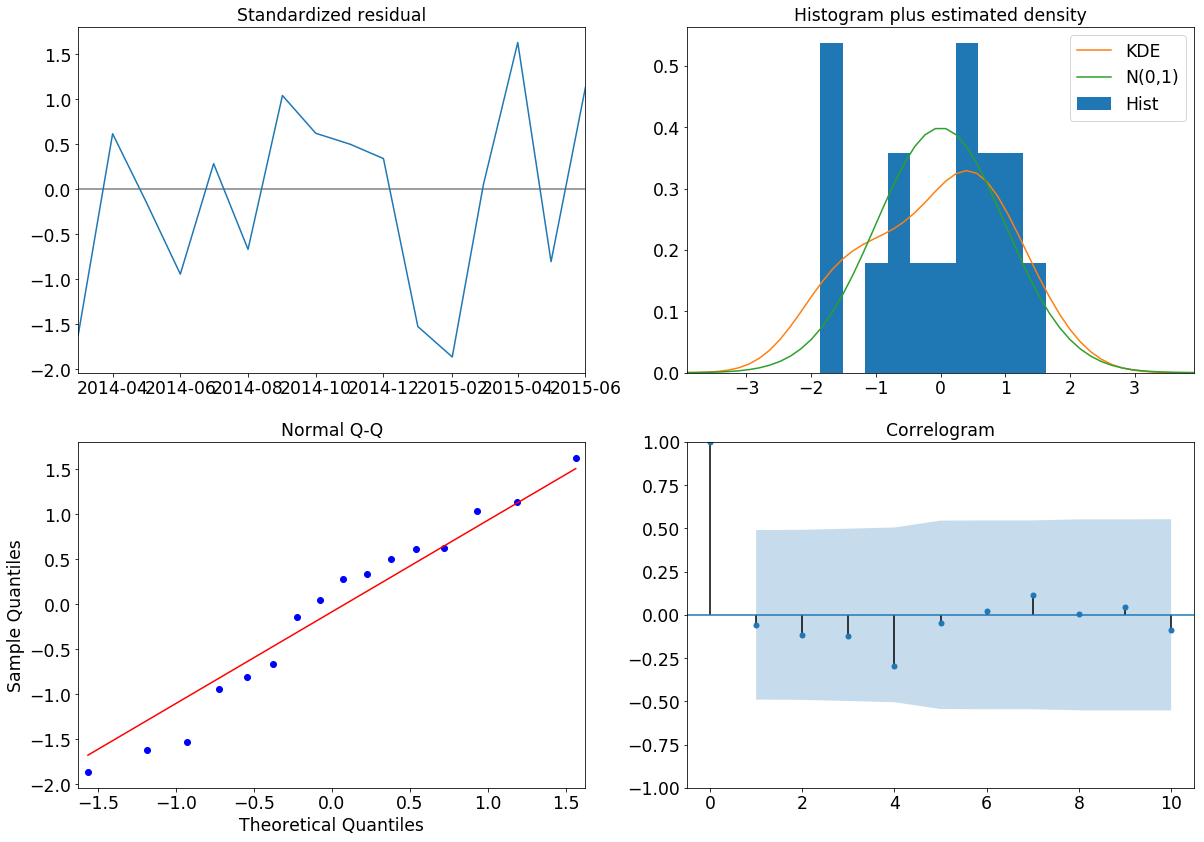




						 Forecasting using trained model - 70% Data 
2016-01-01    0.002520
2016-02-01    0.002568
2016-03-01    0.002823
2016-04-01    0.002791
2016-05-01    0.002723
2016-06-01    0.002636
2016-07-01    0.002359
2016-08-01    0.002826
2016-09-01    0.002560
2016-10-01    0.002686
2016-11-01    0.002803
2016-12-01    0.002934
2017-01-01    0.002950
2017-02-01    0.003063
2017-03-01    0.002648
2017-04-01    0.002832
2017-05-01    0.003068
2017-06-01    0.002470
2017-07-01    0.002682
2017-08-01    0.002952
2017-09-01    0.002614
2017-10-01    0.002522
Freq: MS, dtype: float64



						 Dataframe of Forecasting 
            ORDER_DEMAND_FORECAST
2016-01-01               0.002520
2016-02-01               0.002568
2016-03-01               0.002823
2016-04-01               0.002791
2016-05-01               0.002723
2016-06-01               0.002636
2016-07-01               0.002359
2016-08-01               0.002826
2016-09-01               0.002560
2016-10-01               0.002686
2016-

"\nGiven = go.Scatter(x=diff_warehouse(Warehouse[i]).index, y=diff_warehouse(Warehouse[i]).Order_Demand, mode = 'lines+markers',name = 'Order_Demand'+ Warehouse[i])\nPredicted=go.Scatter(x=Prediction_df.index, y=Prediction_df.ORDER_DEMAND_FORECAST, mode = 'lines+markers',name = 'Predicted_Order_Demand'+ Warehouse[i])\nActual = go.Scatter(x=WH_A_ALLYEARS_FO.index, y=WH_A_ALLYEARS_FO.Order_Demand, mode = 'lines+markers',name = 'Actual')\nFinal_Visu =[Given,Predicted]\nlayout = go.Layout(\ntitle='Forecasted Order Demand for ' + Warehouse[i],\nxaxis=dict(\n        title='Years',\n        titlefont=dict(\n            family='Courier New, monospace',\n            size=18,\n            color='#7f7f7f'\n        )\n    ),\nyaxis=dict(\n        title='Order Demand',\n        titlefont=dict(\n            family='Courier New, monospace',\n            size=18,\n            color='#7f7f7f'\n        )\n    )\n)\nVisu = go.Figure(data=Final_Visu, layout=layout)\nprint plot(Visu, filename='styling-name

In [236]:
train = diff_warehouse(Warehouse[3]).iloc[0:int(len(diff_warehouse(Warehouse[3]))*0.7)]
test = diff_warehouse(Warehouse[3]).iloc[int(len(diff_warehouse(Warehouse[3]))*0.7)+1:]
print  '\n\n\n\n___________________________________________________________________________________________________________________________'
print color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% Warehouse[i] + color.END
stepwise_model = auto_arima(train.Order_Demand, start_p=1, start_q=1,max_p=3, max_q=3, m=25,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,)
order_in = stepwise_model.order
seasonal_order_in = stepwise_model.seasonal_order
print'Least AIC ',stepwise_model.aic()
print'Least BIC ',stepwise_model.bic()
   
mod = sm.tsa.statespace.SARIMAX(train.Order_Demand, trend='n', order=order_in , seasonal_order=seasonal_order_in,enforce_invertibility=False)
results = mod.fit()
print '\n\n\n',results.summary()
    
print '\n\n\n\t\t\t\t\t\t Plotting Diagnostics'
results.plot_diagnostics(figsize=(20, 14))
plt.show()
    
print '\n\n\n\t\t\t\t\t\t Forecasting using trained model - 70% Data '
prediction_1 = results.get_forecast('2017-12')
prediction_1_ci = prediction_1.conf_int()
print(prediction_1.predicted_mean['2016-01':'2017-10'])
    
pred = prediction_1.predicted_mean['2016-01':'2017-10']
    
print '\n\n\n\t\t\t\t\t\t Dataframe of Forecasting '
Prediction_df = pd.DataFrame(pred,columns=['ORDER_DEMAND_FORECAST'])
print Prediction_df
    
    #print("%s",% Warehouse[i].center())
    
   # Prediction_df = pd.DataFrame(prediction_1,columns=['ORDER_DEMAND_FORECAST'])
   # Prediction_df

Given = go.Scatter(x=diff_warehouse(Warehouse[]).index, y=diff_warehouse(Warehouse[i]).Order_Demand, mode = 'lines+markers',name = 'Order_Demand'+ Warehouse[i])
Predicted=go.Scatter(x=Prediction_df.index, y=Prediction_df.ORDER_DEMAND_FORECAST, mode = 'lines+markers',name = 'Predicted_Order_Demand'+ Warehouse[i])
Actual = go.Scatter(x=WH_A_ALLYEARS_FO.index, y=WH_A_ALLYEARS_FO.Order_Demand, mode = 'lines+markers',name = 'Actual')
Final_Visu =[Given,Predicted]
layout = go.Layout(
title='Forecasted Order Demand for ' + Warehouse[i],
xaxis=dict(
        title='Years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
Visu = go.Figure(data=Final_Visu, layout=layout)
print plot(Visu, filename='styling-names')



In [38]:
#diff_warehouse(Warehouse[3])=diff_warehouse(Warehouse[3]).drop(columns=['MA_3', 'MA_3_std'])
xyz=diff_warehouse(Warehouse[3])
xyz = xyz.drop(columns=['MA_3', 'MA_3_std'])
xyz

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,Order_Demand,Warehouse
Month,,
2012-01-01,0.002481,Whse_A
2012-02-01,0.002862,Whse_A
2012-03-01,0.002532,Whse_A
2012-04-01,0.002368,Whse_A
2012-05-01,0.002453,Whse_A
2012-06-01,0.002761,Whse_A
2012-07-01,0.002521,Whse_A
2012-08-01,0.002489,Whse_A
2012-09-01,0.002518,Whse_A


## One more style of visualization including the band of forecast

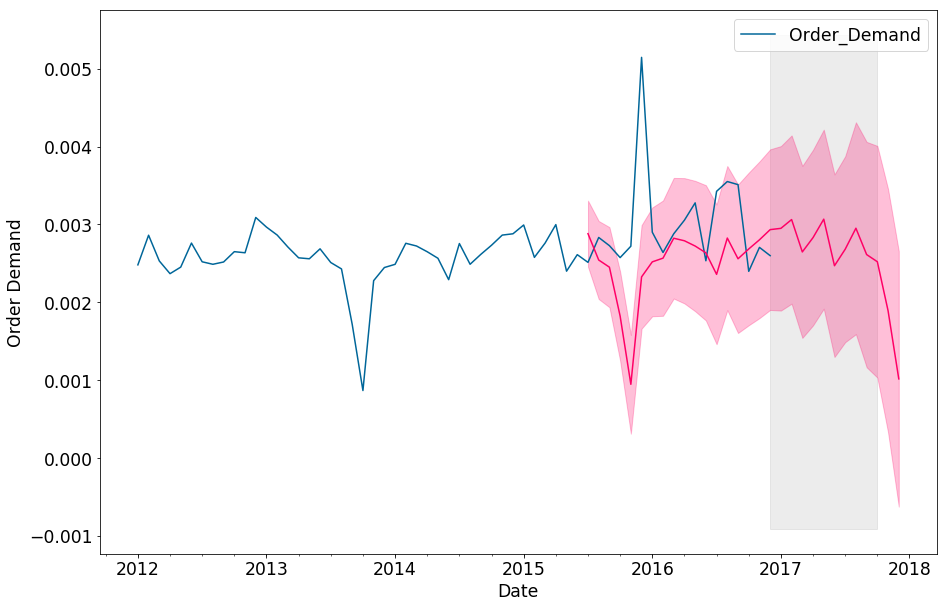

In [238]:
# plot time series and out of sample prediction

ax = xyz['2012':].plot(label='Observed', color='#006699')
prediction_1.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(prediction_1_ci .index,
                prediction_1_ci .iloc[:, 0],
                prediction_1_ci .iloc[:, 1], color='#ff0066', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-12'), PE_1.index[-1], alpha=.15, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Order Demand')
#plt.legend()
#plt.savefig('./img/out_of_sample_pred.png')
plt.show()